In [2]:
#### Importing Libraries ####

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

dataset = pd.read_csv('appdata10.csv')


In [48]:
#### EDA ####

dataset.head(10) # Viewing the Data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [49]:
dataset.describe() # Distribution of Numerical Variables

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [51]:
# First set of Feature cleaning
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [52]:
dataset["hour"]

0         2
1         1
2        19
3        16
4        18
5         9
6         2
7         3
8        14
9        18
10        4
11       11
12        6
13       19
14        4
15       18
16       16
17       21
18        5
19       17
20        9
21        4
22       17
23        2
24       20
25       18
26       16
27        1
28       11
29       17
         ..
49970    15
49971    11
49972    15
49973    18
49974    20
49975    18
49976    20
49977    15
49978    17
49979    14
49980     7
49981     4
49982     2
49983    13
49984    16
49985    23
49986    18
49987    19
49988     2
49989    17
49990    17
49991    22
49992    15
49993     2
49994    19
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [53]:
### Plotting
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [54]:
dataset2.shape[1]

7

<Figure size 432x288 with 0 Axes>

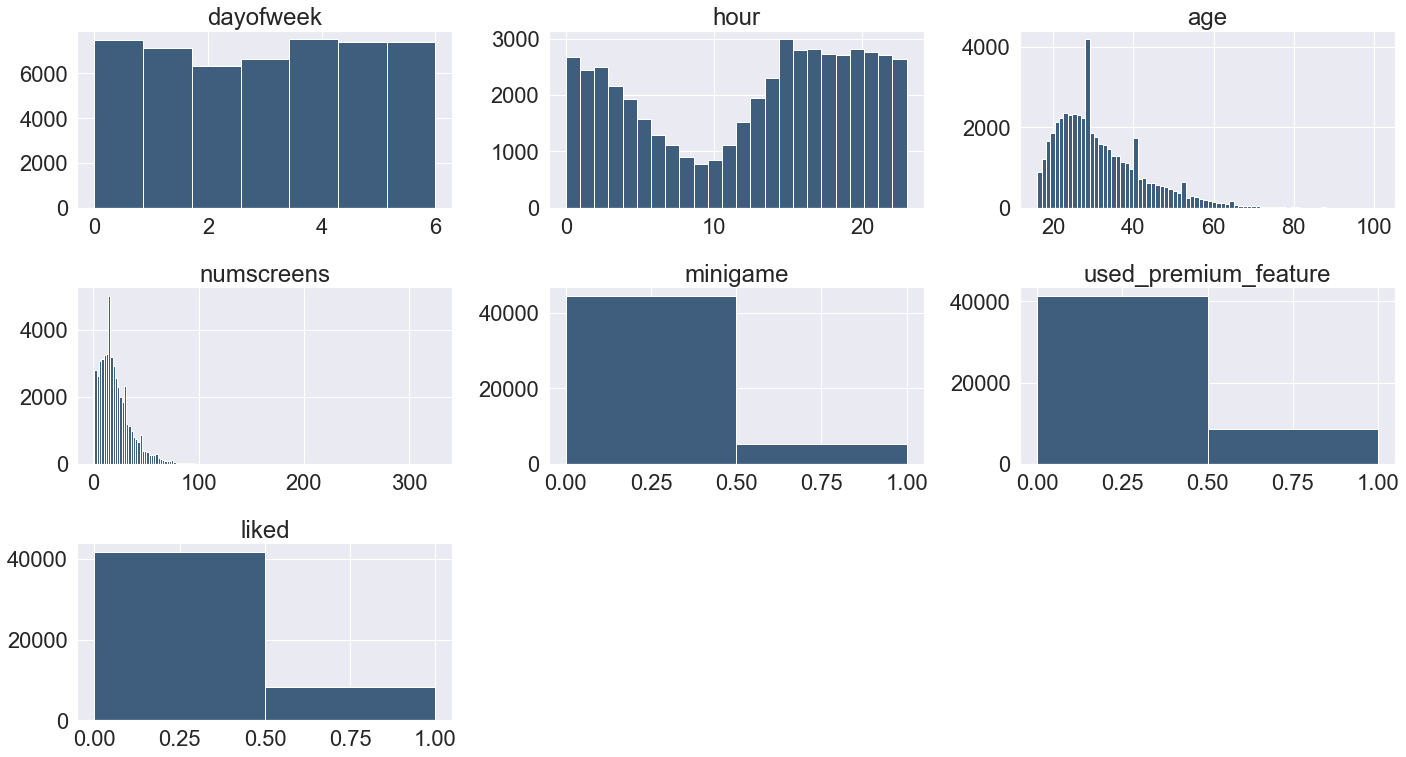

In [55]:
## Histograms
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
sn.set_style('darkgrid')
plt.figure(figsize=(20,12))
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('app_data_hist.jpg')

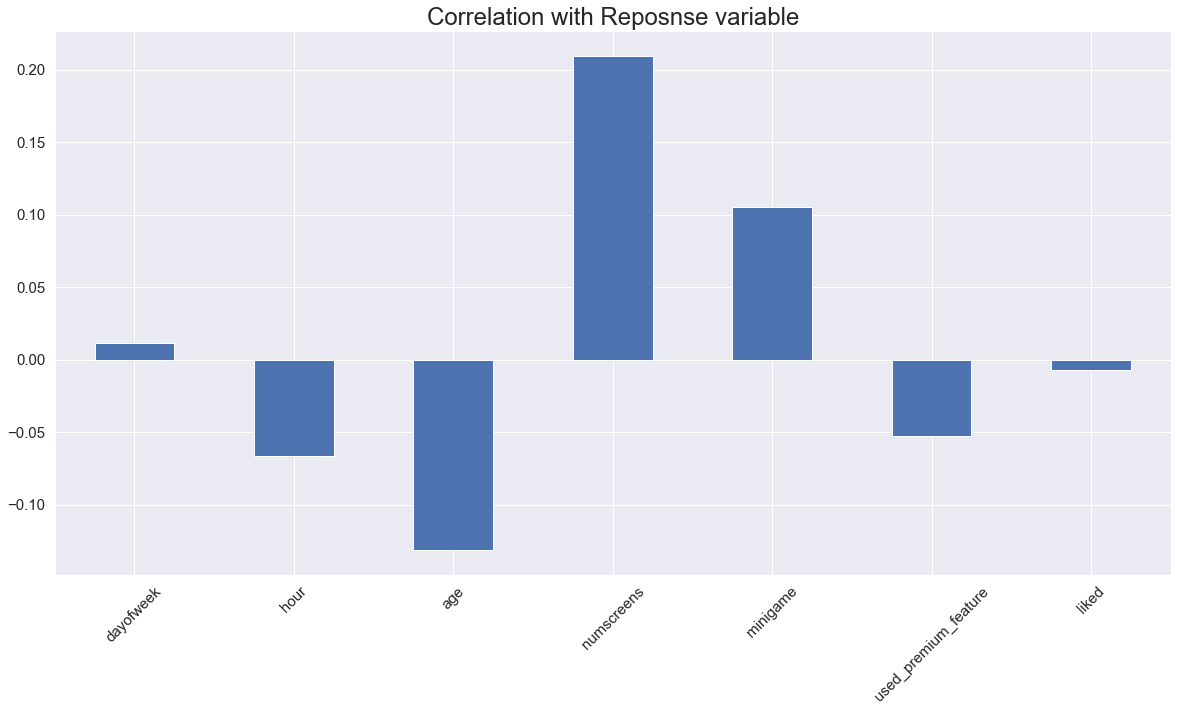

In [56]:
## Correlation with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)


In [57]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

In [58]:
# Compute the correlation matrix
corr = dataset2.corr()

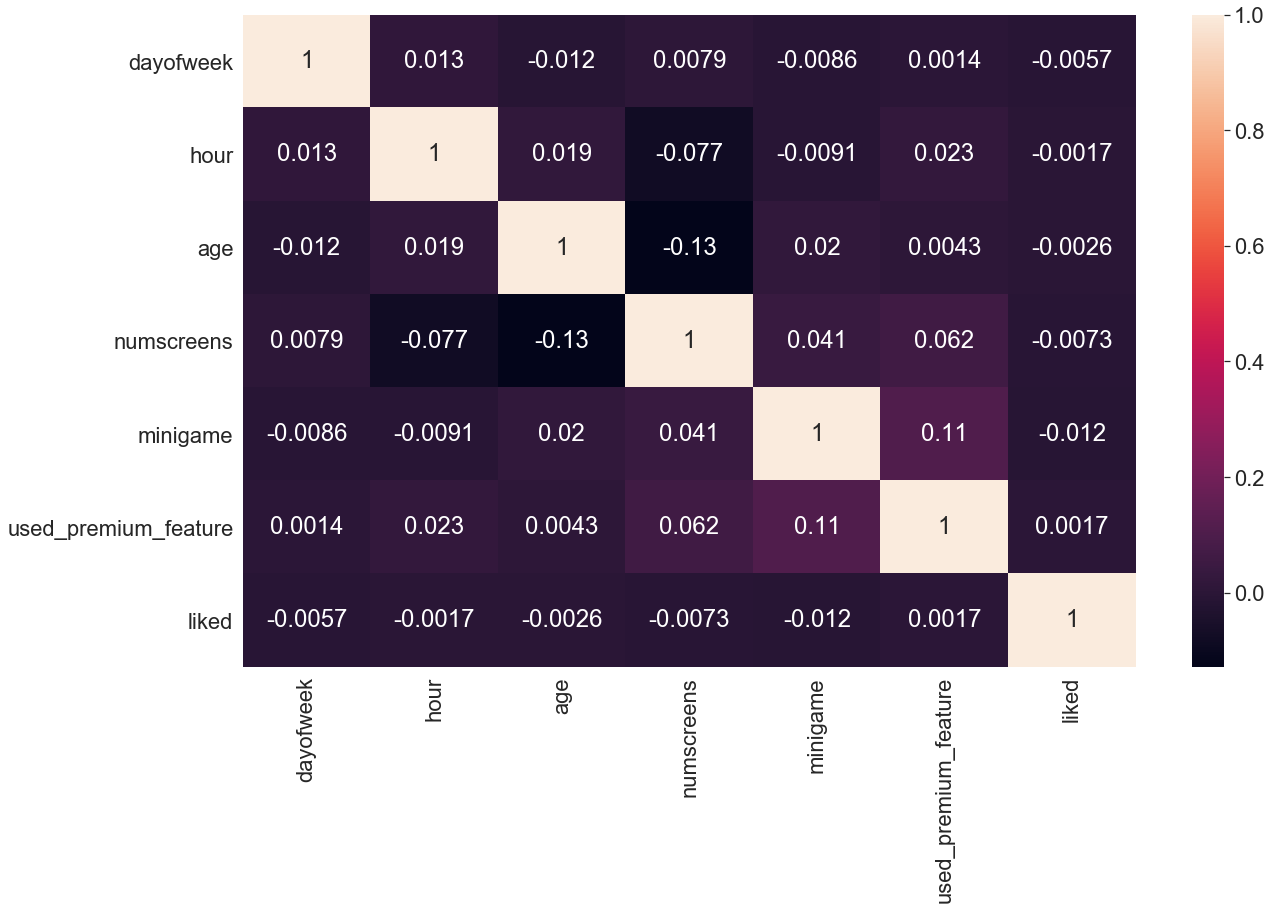

In [59]:
plt.figure(figsize=(20,12))

sn.heatmap(corr,annot=True,Cmap='coolwarm')


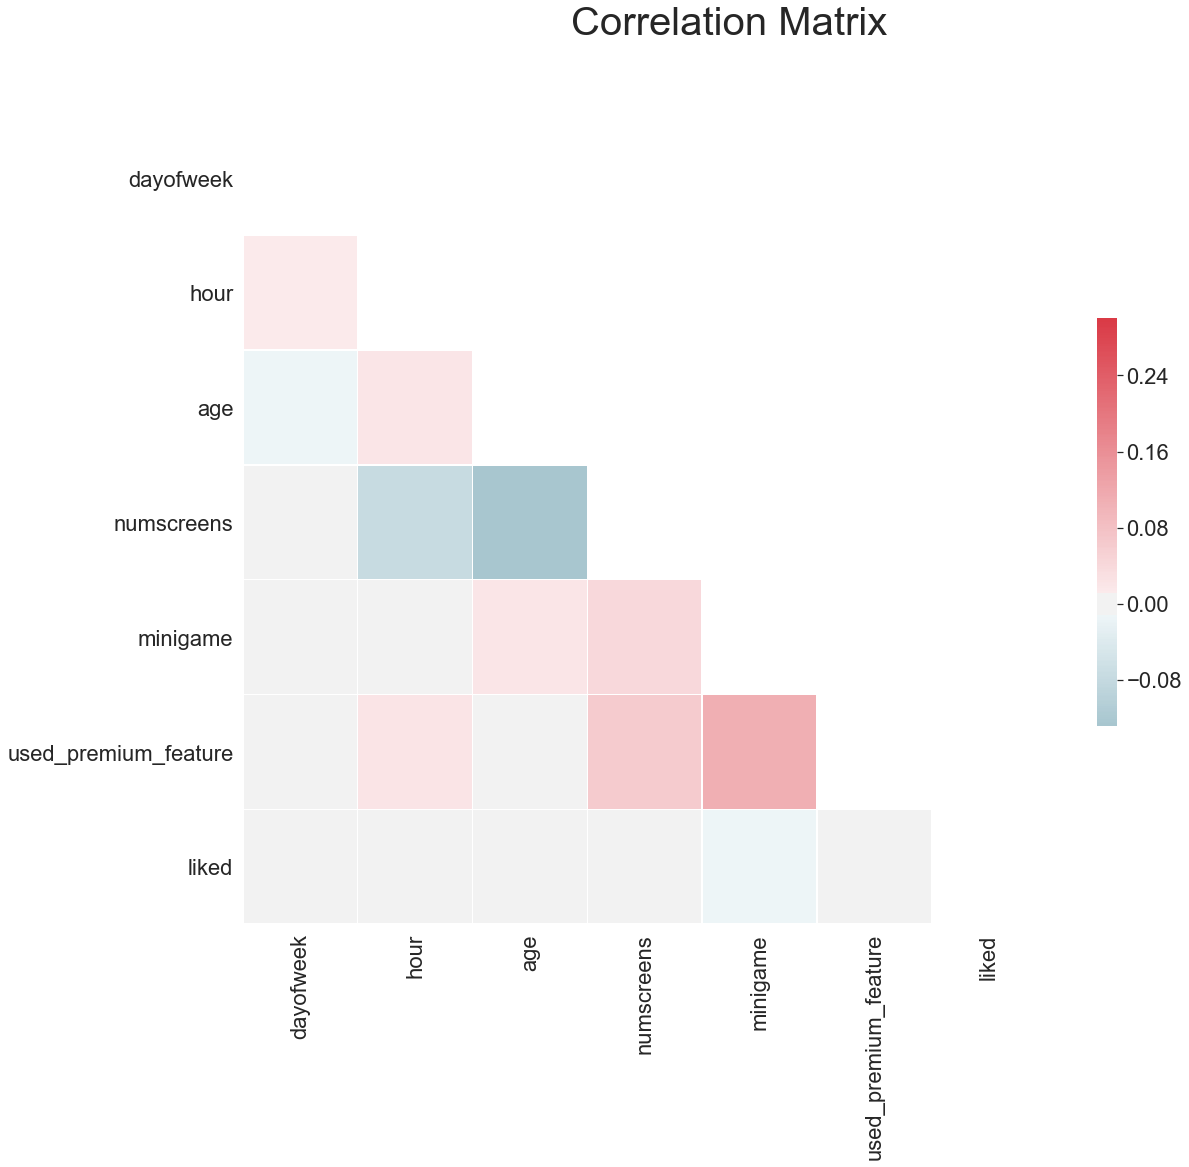

In [60]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [61]:
# Formatting Date Columns
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

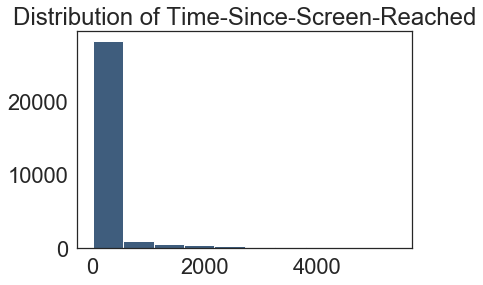

In [62]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

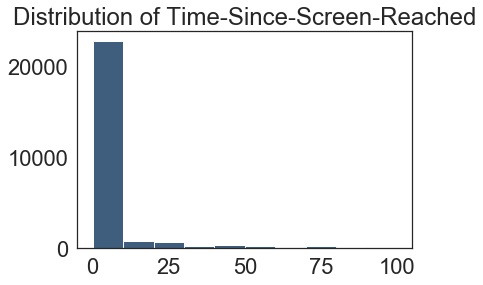

In [63]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [64]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [65]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [72]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,,,,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


AttributeError: 'DataFrame' object has no attribute 'screen_list'

In [71]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [73]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [77]:
dataset.Saving1

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
        ..
49970    0
49971    0
49972    1
49973    0
49974    0
49975    0
49976    1
49977    0
49978    0
49979    0
49980    0
49981    0
49982    0
49983    0
49984    0
49985    0
49986    0
49987    0
49988    0
49989    0
49990    0
49991    0
49992    0
49993    0
49994    0
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Saving1, Length: 50000, dtype: int32

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int32
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
liked                      50000 non-null int64
Loan2                      50000 non-null int32
location                   50000 non-null int32
Institutions               50000 non-null int32
Credit3Container           50000 non-null int32
VerifyPhone                50000 non-null int32
BankVerification           50000 non-null int32
VerifyDateOfBirth          50000 non-null int32
ProfilePage                50000 non-null int32
VerifyCountry              50000 non-null int32
Cycle                      

In [37]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [38]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [39]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)


In [40]:

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [41]:
#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [43]:
dataset.to_csv('new_appdata10_1.csv', index = False)

In [78]:
import time


In [79]:
# Splitting Independent and Response Variables
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [81]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [82]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [83]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)


C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [86]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.7711

In [87]:
precision_score(y_test, y_pred) # tp / (tp + fp)


0.7705556694689358

In [88]:
recall_score(y_test, y_pred) # tp / (tp + fn)


0.7625811688311688

In [89]:
f1_score(y_test, y_pred)

0.7665476797552269

Test Data Accuracy: 0.7711


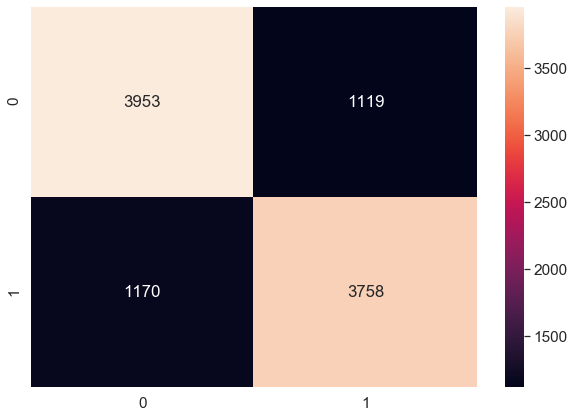

In [90]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [92]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))




C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

SVM Accuracy: 0.774 (+/- 0.012)


In [95]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.034137
1,hour,0.000110
2,age,-0.147995
3,numscreens,-0.130512
4,minigame,-0.040650
5,used_premium_feature,-0.044459
6,liked,0.008486
7,Loan2,-0.205427
8,location,-0.060121
9,Institutions,-0.031091


In [94]:

## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 40.47 seconds


In [110]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.77395, {'C': 0.1, 'penalty': 'l1'})

In [111]:

## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))


C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 34.23 seconds


In [112]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.77395, {'C': 0.1, 'penalty': 'l1'})

In [113]:
grid_search.best_score_

0.77395

In [119]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results

,enrolled,user
11841,1,239786
19602,1,279644
45519,0,98290
25747,1,170150
42642,1,237568
31902,1,65042
30346,1,207226
12363,0,363062
32490,1,152296
26128,0,64484


In [106]:
final_results['predicted_reach'] = y_pred


In [108]:
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [109]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


In [3]:
 index = pd.date_range('1/1/2000', periods=9, freq='T')
 series = pd.Series(range(9), index=index)
 series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [4]:
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [5]:
series.resample('3T', label='right').sum()

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

In [6]:
series.resample('3T', label='left').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [8]:
print(series.resample('3T', label='right', closed='right'))

DatetimeIndexResampler [freq=<3 * Minutes>, axis=0, closed=right, label=right, convention=start, base=0]


In [9]:
series.resample('3T', label='right', closed='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3T, dtype: int64

In [12]:
series.resample('3T', label='right', closed='right').first()

2000-01-01 00:00:00    0
2000-01-01 00:03:00    1
2000-01-01 00:06:00    4
2000-01-01 00:09:00    7
Freq: 3T, dtype: int64

In [13]:
series.resample('3T', label='right', closed='left').sum()

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

In [14]:
 df = pd.DataFrame({'B': [0, 1, 2, 6, 4]},
                   index = [pd.Timestamp('20130101 09:00:00'),
                            pd.Timestamp('20130101 09:00:02'),
                           pd.Timestamp('20130101 09:00:03'),
                           pd.Timestamp('20130101 09:00:05'),
                            pd.Timestamp('20130101 09:00:06')])

In [15]:
df


,B
2013-01-01 09:00:00,0
2013-01-01 09:00:02,1
2013-01-01 09:00:03,2
2013-01-01 09:00:05,6
2013-01-01 09:00:06,4


In [27]:
df.rolling(2).sum()

,B
2013-01-01 09:00:00,NaN
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,8.0
2013-01-01 09:00:06,10.0


In [29]:
df.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,6.0
2013-01-01 09:00:06,10.0


In [30]:
df.rolling('2s').mean()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,1.5
2013-01-01 09:00:05,6.0
2013-01-01 09:00:06,5.0


In [26]:
df.rolling('3s').sum()


,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,8.0
2013-01-01 09:00:06,10.0


In [31]:
df.rolling('3s').mean()


,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,0.5
2013-01-01 09:00:03,1.5
2013-01-01 09:00:05,4.0
2013-01-01 09:00:06,5.0
